# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Reading the data

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import sklearn

from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
##ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [75]:
bsdata=pd.read_csv('day.csv')
bsdata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [76]:
bsdata.shape

(730, 16)

In [77]:
bsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [78]:
bsdata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We can deduce from the table above that there are possibly no outliers in the given dataset. This can be seen when mean is compared to the median.

In [79]:
bsdata.size

11680

In [80]:
bsdata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

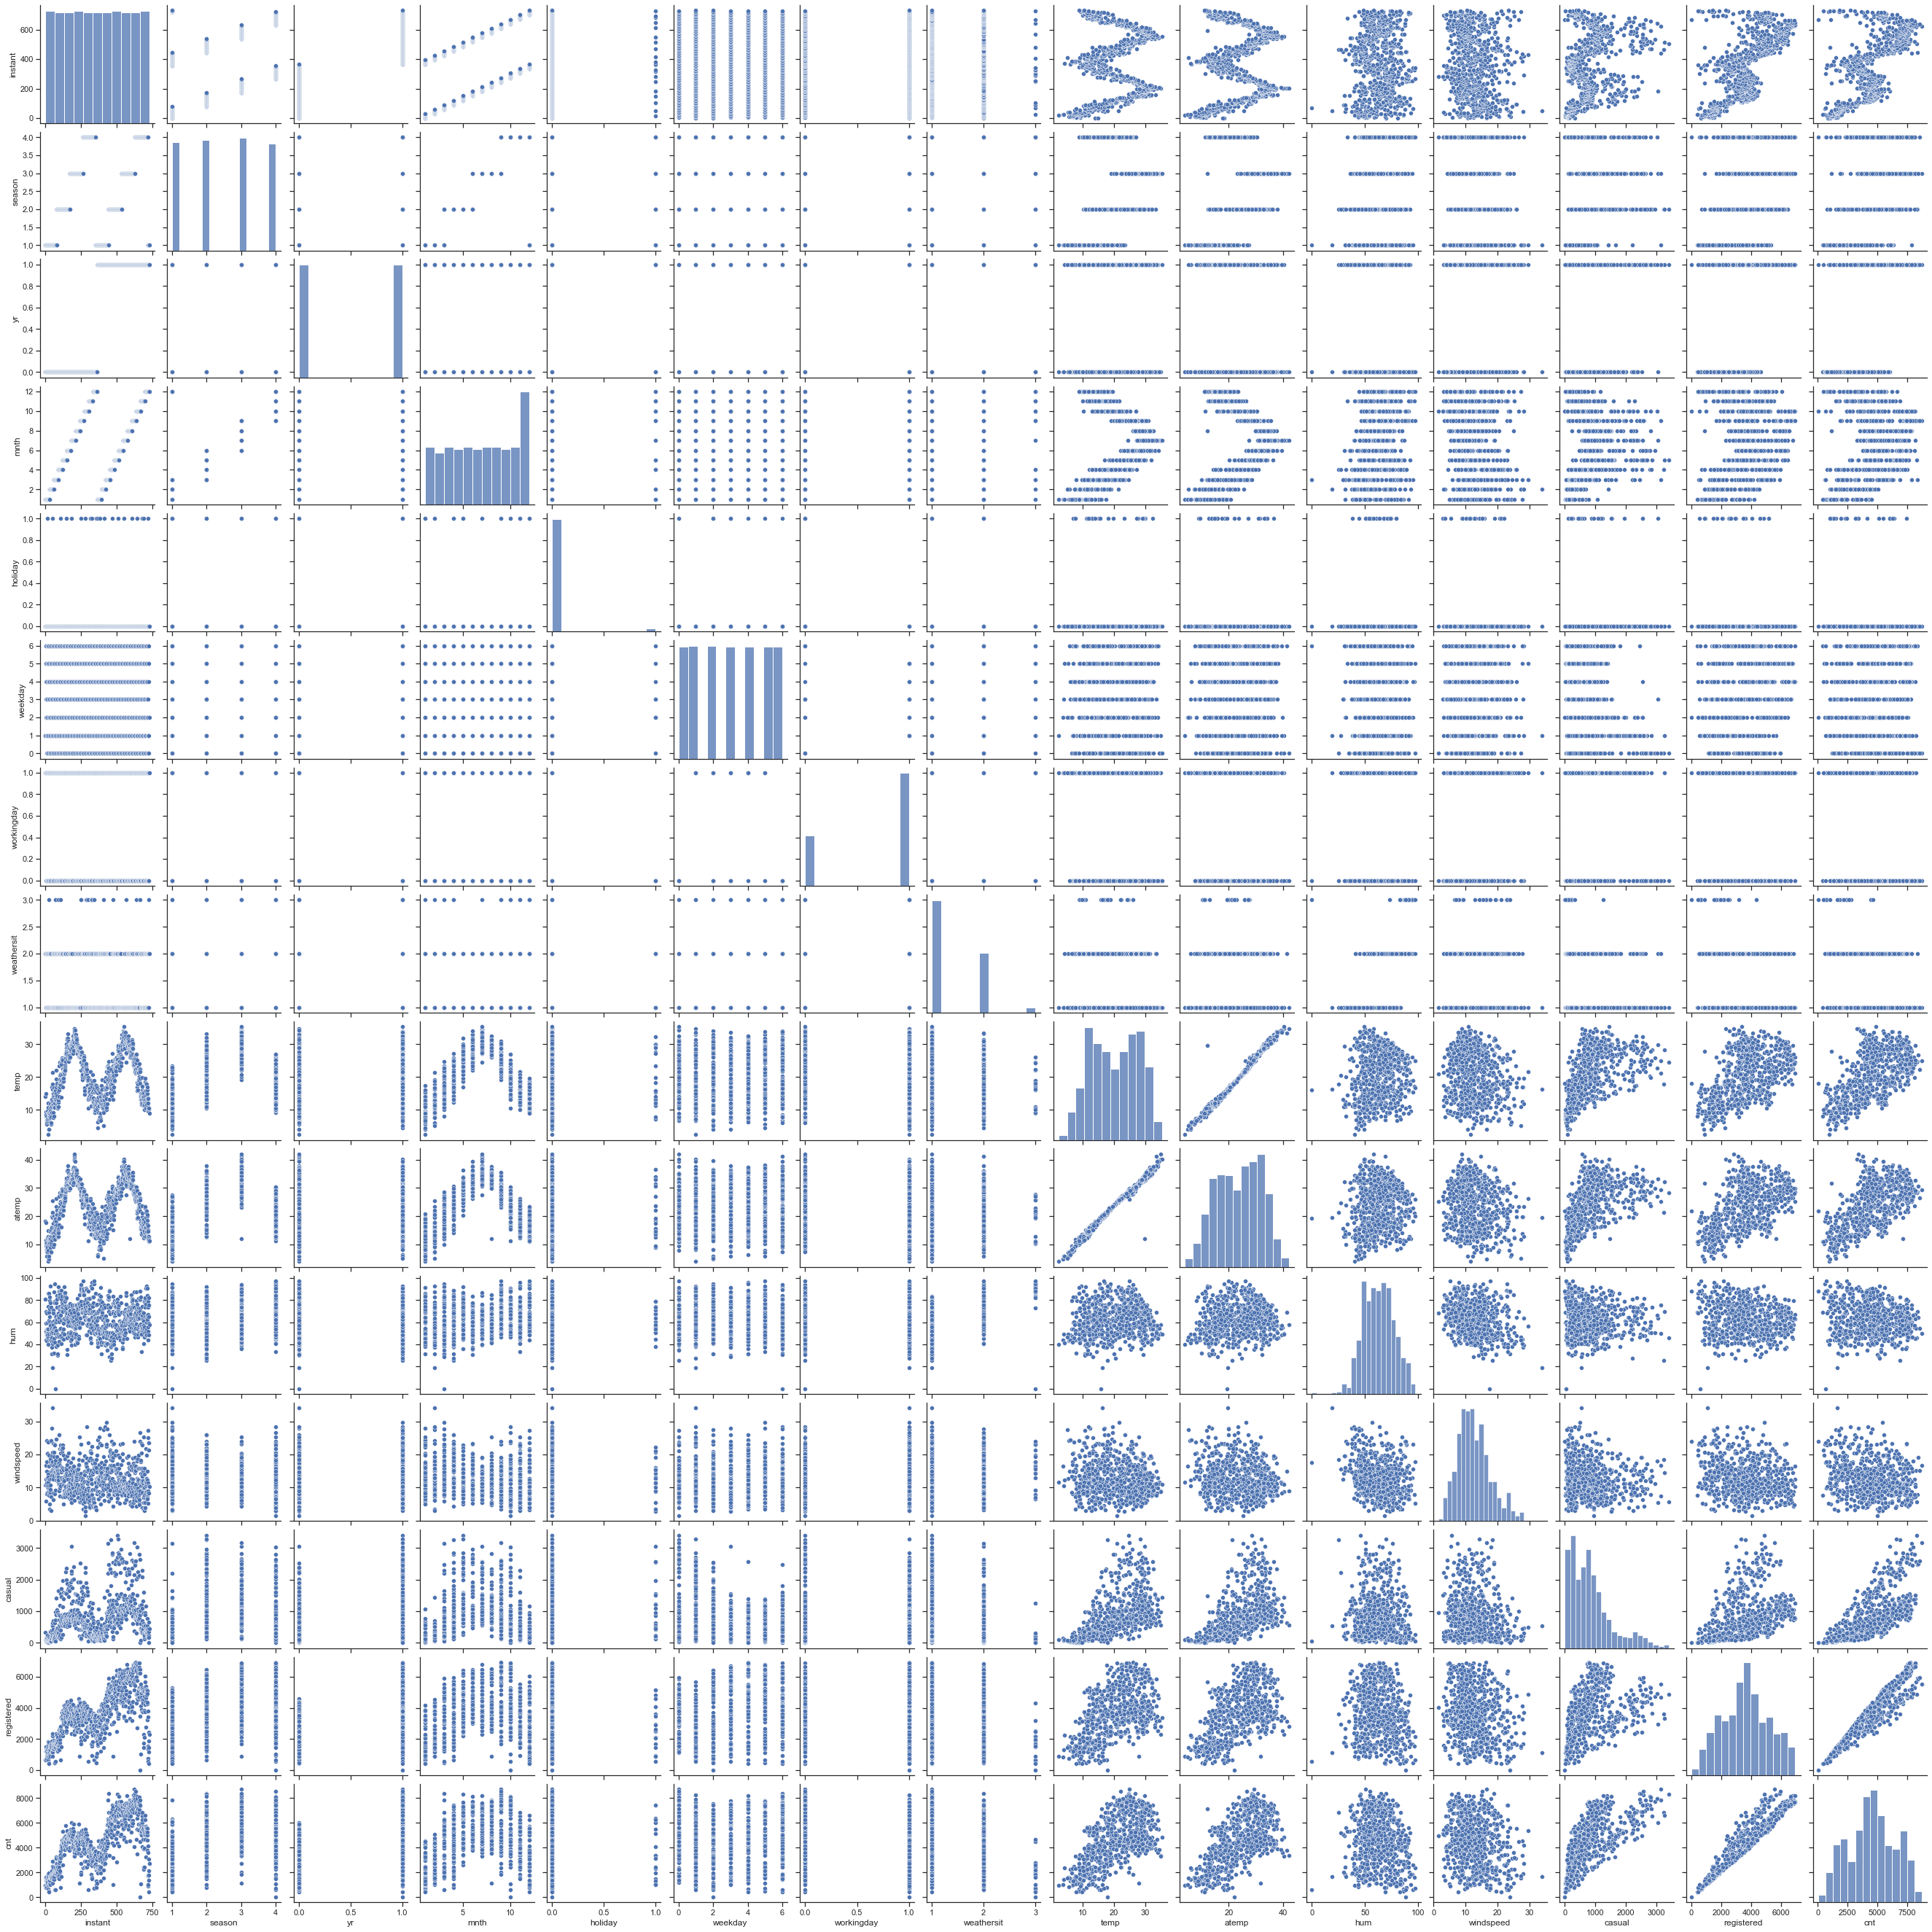

In [81]:
sns.pairplot(bsdata)

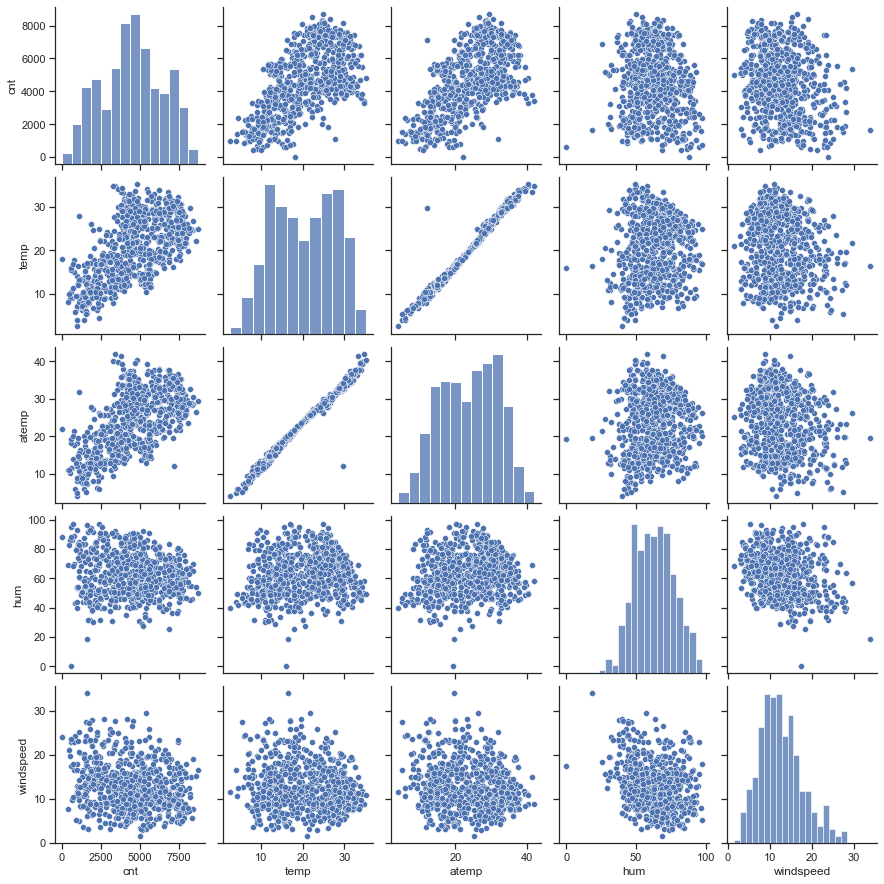

In [82]:
#only the numerical variables
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=bsdata,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

## Looking into the data types present in the dataset

In [83]:
bsdata.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

most of the columns have int or float datatype

Let's see the number of colums and rows in the data

In [84]:
bsdata.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [85]:
bsdata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the information given above, the dataset has 16 columns and 730 rows. But we have no columns with null value

## Understanding the dataset some more

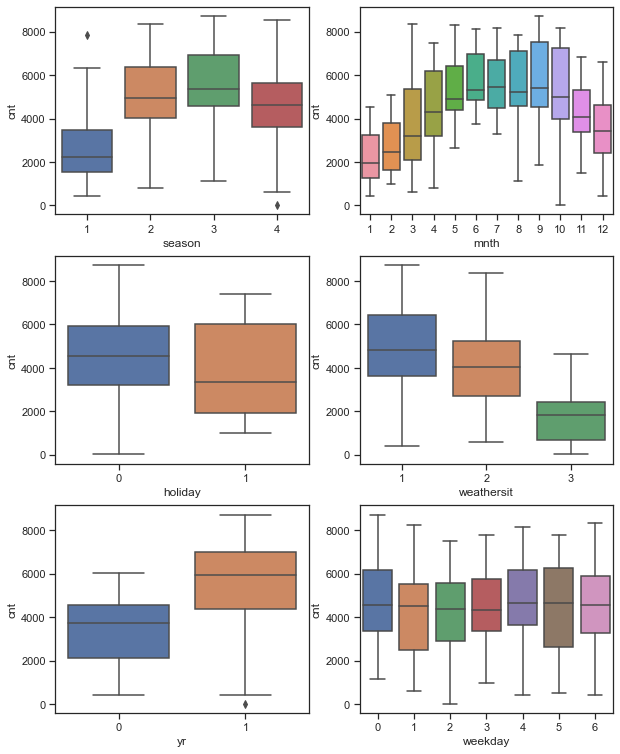

In [86]:
##Just considering the categorical variable
plt.figure(figsize=(10, 13))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bsdata)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bsdata)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bsdata)
plt.subplot(3,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bsdata)
plt.subplot(3,2,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bsdata)
plt.subplot(3,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bsdata)
plt.show()

-We already know that in 'yr' variable, 0 means 2018 and 1 means 2019. So from the data given above we can say that bike sharing service saw a increase in 2019.

-On holidays the bike sharing is more.

-People prefer 'clear, few clouds, partly cloudy' for bike sharing

-Fall is the preferred season

## Getting into cleaning the data

#### It is better to drop the columns we won't be using for our model

In [87]:
bsdata.drop(['dteday','instant','registered','casual',],axis = 1,inplace = True)
bsdata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


At this point, it is better to attach appropriate labels to some numeric columns related to description of time

In [88]:
import calendar
bsdata['mnth'] = bsdata['mnth'].apply(lambda x: calendar.month_abbr[x])
bsdata.season = bsdata.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
bsdata.weathersit = bsdata.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
bsdata.weekday = bsdata.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})
bsdata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [89]:
bsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [90]:
bsdata.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [91]:
bsdata.weekday.value_counts()

Tuesday      105
Monday       105
Saturday     104
Sunday       104
Thrusday     104
Friday       104
Wednesday    104
Name: weekday, dtype: int64

In [92]:
bsdata.temp.value_counts()

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64

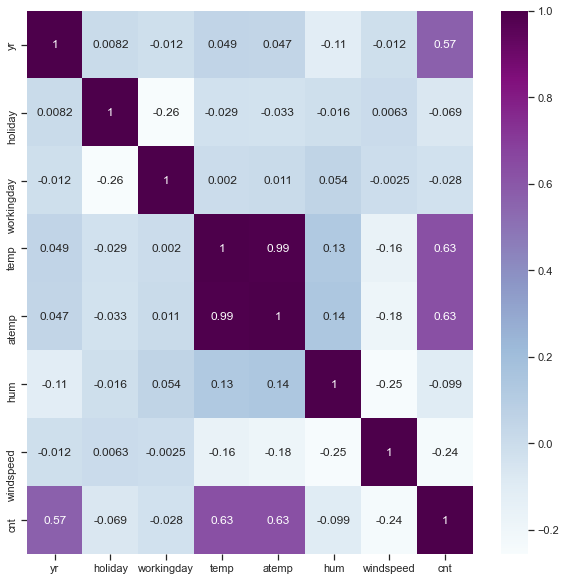

In [93]:
cor=bsdata.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="BuPu", annot = True)
plt.show()

The correlation between temp (temperature in Celsius) and atemp (feeling temperature in Celsius)is quite high. These variables also have an affect on the cnt variable(count of total rental bikes including both casual and registered).

### before creating dummy variables we have to drop some numeric variables

In [94]:
bsdata = pd.get_dummies(data=bsdata,columns=["season","mnth","weekday"],drop_first=True)
bsdata = pd.get_dummies(data=bsdata,columns=["weathersit"])

In [95]:
bsdata.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Clear',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [96]:
bsdata.shape

(730, 31)

In [97]:
x=bsdata
y=bsdata.pop('cnt')

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3, random_state=42)

In [99]:
x.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [100]:
print(x_train.shape)
print(x_test.shape)

(510, 30)
(219, 30)


In [101]:
#begin scaling the numerical features
num_trans = ['temp','atemp','hum','windspeed','workingday']

In [102]:
sca = MinMaxScaler()
x_train[num_trans] = sca.fit_transform(x_train[num_trans])

In [103]:
x_train.shape

(510, 30)

In [104]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
683,1,0,1.0,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0.0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1.0,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,0,0,1,1,0,0
360,0,0,1.0,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1.0,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [105]:
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.698039,0.551091,0.526680,0.653801,0.414566,0.231373,0.256863,0.250980,...,0.090196,0.149020,0.143137,0.133333,0.135294,0.156863,0.133333,0.625490,0.029412,0.345098
std,0.500025,0.163554,0.459559,0.227401,0.213153,0.143542,0.185671,0.422124,0.437332,0.434003,...,0.286744,0.356457,0.350557,0.340268,0.342373,0.364028,0.340268,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating and analysing linear models

### Model 1

In [106]:
model1=LinearRegression()
model1

LinearRegression()

In [107]:
model1.fit(x_train,y_train)

LinearRegression()

Feature: 0, Score: 1954.47722
Feature: 1, Score: -599.69648
Feature: 2, Score: -60.00828
Feature: 3, Score: 973.88468
Feature: 4, Score: 2794.04833
Feature: 5, Score: -1358.60327
Feature: 6, Score: -913.97979
Feature: 7, Score: -1217.05956
Feature: 8, Score: 99.73484
Feature: 9, Score: 615.68142
Feature: 10, Score: -33.29348
Feature: 11, Score: -323.41612
Feature: 12, Score: 108.57750
Feature: 13, Score: 3.09506
Feature: 14, Score: -319.88225
Feature: 15, Score: 55.13368
Feature: 16, Score: 410.75454
Feature: 17, Score: 267.62396
Feature: 18, Score: -414.84410
Feature: 19, Score: 341.27834
Feature: 20, Score: 639.52800
Feature: 21, Score: -272.06206
Feature: 22, Score: -47.65639
Feature: 23, Score: 11.19541
Feature: 24, Score: -0.44208
Feature: 25, Score: -186.76550
Feature: 26, Score: -194.56050
Feature: 27, Score: 775.43773
Feature: 28, Score: -1070.78207
Feature: 29, Score: 295.34433


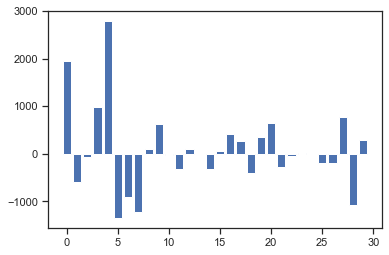

In [108]:
importance=model1.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [109]:
rfe = RFE(model1,16)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=16)

#### Detecting multicollinearity through variable inflation factors (VIF)

VIF score of an independent variable represents how well the variable is explained by other independent variables

In [110]:
def vif_val(cols):
    x1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = x1.columns
    vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))
def model_prep(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    model2 = sm.OLS(y_train, x_train_sm).fit()
    print(model2.summary())
    return model2

Features that made the cut:

In [111]:
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Clear',
       'weathersit_Light Snow & Rain'],
      dtype='object')

#### Taking all the above mentioned features for further analysis

In [112]:
x_train_rfe = x_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Clear',
       'weathersit_Light Snow & Rain']]
x_train_rfe.shape

(510, 16)

We have the top 16 features!

In [113]:
cols=['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Clear',
       'weathersit_Light Snow & Rain']
model_prep(cols)
vif_val(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.14e-185
Time:                        17:25:18   Log-Likelihood:                -4113.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     493   BIC:                             8333.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [114]:
x_train_rfe = sm.add_constant(x_train_rfe)
m1 = sm.OLS(y_train,x_train_rfe).fit()   
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.14e-185
Time:                        17:25:18   Log-Likelihood:                -4113.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     493   BIC:                             8333.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2726.0930    338.833      8.046      0.000    2060.357    3391.829
yr                            1957.8246     70.632     27.719      0.000    1819.048    2096.601
holiday                       -590.9277    214.573     -2.754      0.006   -1012.517    -169.338
temp                           704.4245   2028.697      0.347      0.729   -3281.533    4690.382
atemp                         3132.0816   2167.724      1.445      0.149   -1127.035    7391.199
hum                          -1455.1619    335.237     -4.341      0.000   -2113.832    -796.492
windspeed                     -950.2440    212.841     -4.465      0.000   -1368.432    -532.057
season_Spring                -1233.9592    144.367     -8.547      0.000   -1517.609    -950.309
season_Winter                  804.3435    123.503      6.513      0.000     561.687    1047.000
mnth_Dec                      -504.0736    150.182     -3.356      0.001    -799.150    -208.997
mnth_Jul                      -416.5754    143.567     -2.902      0.004    -698.654    -134.497
mnth_Mar                       423.4353    151.893      2.788      0.006     124.999     721.872
mnth_May                       294.4135    134.010      2.197      0.028      31.112     557.714
mnth_Nov                      -665.4401    157.736     -4.219      0.000    -975.358    -355.522
mnth_Sep                       524.2787    132.645      3.953      0.000     263.660     784.898
weathersit_Clear               468.2226     92.008      5.089      0.000     287.446     648.999
weathersit_Light Snow & Rain -1319.4241    221.413     -5.959      0.000   -1754.454    -884.395
==============================================================================
Omnibus:                       78.808   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.336
Skew:                          -0.827   Prob(JB):                     8.44e-39
Kurtosis:                       5.348   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
y_pred = model1.predict(x_test)

In [120]:
r2 = r2_score(y_test,y_pred)
print(r2)

-340.3254873915568


In [121]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 30766.856684311006


In [122]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 1266508868.6497114


Since, model 1 has 2 features that have p values>0.05. We will try to eliminate one of them such that null hypothesis can be rejected

### Model 2

In [123]:
new_x_train = x_train_rfe.drop(['temp'], axis=1)
new_x_train.describe

<bound method NDFrame.describe of      const  yr  holiday     atemp       hum  windspeed  season_Spring  \
683    1.0   1        0  0.322150  0.639330   0.327101              0   
645    1.0   1        1  0.404998  0.731215   0.419004              0   
163    1.0   0        0  0.685963  0.509660   0.708724              0   
360    1.0   0        0  0.326273  0.785745   0.415925              1   
640    1.0   1        0  0.682653  0.817947   0.110593              0   
..     ...  ..      ...       ...       ...        ...            ...   
700    1.0   1        0  0.367719  0.848432   0.255447              0   
71     1.0   0        0  0.395131  0.543468   0.621696              1   
106    1.0   0        0  0.481247  0.494203   0.704080              0   
270    1.0   0        0  0.651183  0.874624   0.316186              0   
435    1.0   1        0  0.499487  0.504079   0.464173              1   

     season_Winter  mnth_Dec  mnth_Jul  mnth_Mar  mnth_May  mnth_Nov  \
683              

In [124]:
x_train_const = sm.add_constant(new_x_train)
nm = sm.OLS(y_train,x_train_const).fit()
nm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.9
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.69e-186
Time:                        17:32:42   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     494   BIC:                             8327.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2723.3561    338.440      8.047      0.000    2058.397    3388.315
yr                            1957.9112     70.568     27.745      0.000    1819.260    2096.562
holiday                       -586.3217    213.971     -2.740      0.006   -1006.728    -165.915
atemp                         3877.1520    307.567     12.606      0.000    3272.851    4481.453
hum                          -1463.9407    333.985     -4.383      0.000   -2120.147    -807.734
windspeed                     -932.4686    206.409     -4.518      0.000   -1338.017    -526.921
season_Spring                -1235.6056    144.160     -8.571      0.000   -1518.849    -952.363
season_Winter                  798.6237    122.290      6.531      0.000     558.351    1038.896
mnth_Dec                      -507.0947    149.797     -3.385      0.001    -801.412    -212.778
mnth_Jul                      -413.6152    143.186     -2.889      0.004    -694.944    -132.286
mnth_Mar                       418.2763    151.030      2.769      0.006     121.537     715.016
mnth_May                       291.3362    133.597      2.181      0.030      28.847     553.826
mnth_Nov                      -667.2194    157.512     -4.236      0.000    -976.696    -357.742
mnth_Sep                       528.4647    131.978      4.004      0.000     269.157     787.773
weathersit_Clear               466.0785     91.719      5.082      0.000     285.871     646.286
weathersit_Light Snow & Rain -1311.6808    220.091     -5.960      0.000   -1744.110    -879.251
==============================================================================
Omnibus:                       79.422   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.100
Skew:                          -0.832   Prob(JB):                     3.49e-39
Kurtosis:                       5.359   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To display the OLS regression results of model 2, we had to introduce a constant variable (x_train_const). The regression algorithm was fed the training data set minus the variable we deduced to have a higher p value.

So when we compare these two models, we can make an assumption that model 2 is slightly better than model 1. This actually makes sense, when we keep the correlation between 'atemp' and 'temp' in our mind.

But we still have to analyse VIF values

In [125]:
vif = pd.DataFrame()
x=new_x_train
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features    VIF
0                          const  95.31
3                          atemp   3.57
6                  season_Spring   3.08
7                  season_Winter   2.34
4                            hum   1.91
12                      mnth_Nov   1.73
14              weathersit_Clear   1.64
9                       mnth_Jul   1.43
8                       mnth_Dec   1.29
11                      mnth_May   1.24
5                      windspeed   1.22
13                      mnth_Sep   1.19
15  weathersit_Light Snow & Rain   1.15
10                      mnth_Mar   1.12
1                             yr   1.03
2                        holiday   1.02


So we checked the VIF for the second model, and found out that there are variables which have value higher than 5. we should get rid of them.

In [126]:
new_x_train = new_x_train.drop(['hum','const'], axis=1)
#and checking VIF again
vif = pd.DataFrame()
x = new_x_train
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.64
3,windspeed,4.95
12,weathersit_Clear,2.84
5,season_Winter,2.45
0,yr,2.09
4,season_Spring,1.96
10,mnth_Nov,1.82
7,mnth_Jul,1.53
6,mnth_Dec,1.32
9,mnth_May,1.31


Now we have data that we can use to create our final model!

## Final model (wohoo!)

In [127]:
x_train_const = sm.add_constant(new_x_train)
fmod = sm.OLS(y_train,x_train_const).fit()
fmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.46e-183
Time:                        17:32:42   Log-Likelihood:                -4123.4
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1676.8912    244.257      6.865      0.000    1196.984    2156.799
yr                            2002.0981     71.118     28.152      0.000    1862.368    2141.828
holiday                       -600.2029    217.848     -2.755      0.006   -1028.225    -172.181
atemp                         3618.6556    307.363     11.773      0.000    3014.758    4222.553
windspeed                     -679.3564    201.780     -3.367      0.001   -1075.807    -282.906
season_Spring                -1288.9482    146.264     -8.812      0.000   -1576.324   -1001.572
season_Winter                  729.8894    123.491      5.910      0.000     487.257     972.521
mnth_Dec                      -553.5604    152.145     -3.638      0.000    -852.490    -254.631
mnth_Jul                      -376.9821    145.548     -2.590      0.010    -662.950     -91.014
mnth_Mar                       450.3710    153.602      2.932      0.004     148.578     752.164
mnth_May                       219.3569    135.002      1.625      0.105     -45.890     484.604
mnth_Nov                      -672.5420    160.379     -4.193      0.000    -987.650    -357.434
mnth_Sep                       457.5579    133.371      3.431      0.001     195.515     719.601
weathersit_Clear               697.9707     76.289      9.149      0.000     548.080     847.861
weathersit_Light Snow & Rain -1514.8406    219.078     -6.915      0.000   -1945.277   -1084.404
==============================================================================
Omnibus:                       76.139   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.550
Skew:                          -0.795   Prob(JB):                     3.40e-38
Kurtosis:                       5.365   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### train data-residual analysis

Text(0.5, 0, 'Residual errors')

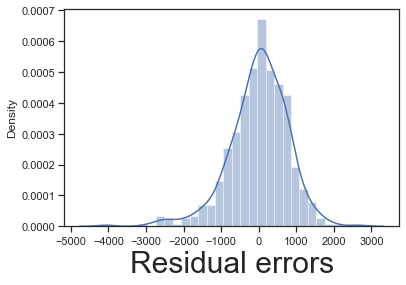

In [128]:
y_train_const = fmod.predict(x_train_const)
fig = plt.figure()
sns.distplot((y_train - y_train_const), bins = 30)
plt.xlabel('Residual errors', fontsize = 30)  

The residual error terms are normally distributed, which is also our major assumption.

## Evaluating our model

In [129]:
x_test = sm.add_constant(x_test)
test_col = x_train_const.columns
x_test=x_test[test_col[1:]]
# Again, Adding constant to test set
x_test = sm.add_constant(x_test)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   yr                            219 non-null    int64  
 2   holiday                       219 non-null    int64  
 3   atemp                         219 non-null    float64
 4   windspeed                     219 non-null    float64
 5   season_Spring                 219 non-null    uint8  
 6   season_Winter                 219 non-null    uint8  
 7   mnth_Dec                      219 non-null    uint8  
 8   mnth_Jul                      219 non-null    uint8  
 9   mnth_Mar                      219 non-null    uint8  
 10  mnth_May                      219 non-null    uint8  
 11  mnth_Nov                      219 non-null    uint8  
 12  mnth_Sep                      219 non-null    uint8  
 13  wea

In [130]:
y_pred1 = fmod.predict(x_test)

In [134]:
fmod=LinearRegression()
fmod.fit(x_train_const,y_train)

LinearRegression()

Text(0, 0.5, 'y_pred')

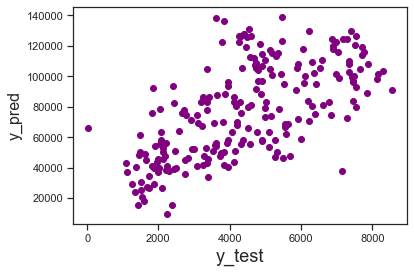

In [135]:
plt.scatter(y_test, y_pred1,color='purple')
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)

The obtained model more or less is good enough for predicting y values in the test dataset.

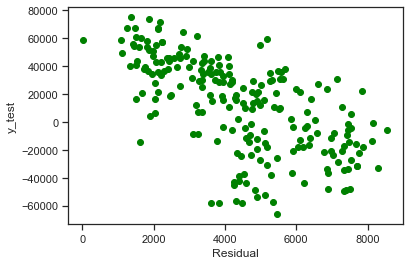

In [136]:
residual = (y_test - y_pred)
plt.scatter(y_test,residual,color='green')
plt.ylabel("y_test")
plt.xlabel("Residual")
plt.show()

Residual vs test set, it is diagonally opposite to the previous graph

From the analysis above, we can see that the y_test vs y_test_pred and y_test vs predictions based on x_test follow a similar pattern.

## Conclusion

- Variables such as Sunday, holiday, temp, hum, windspeed, Season, year 2019, mnth_Dec, mnth_Jul, mnth_Mar, mnth_Nov, mnth_Sep, were seen to impact the sharing services.
- Weather was also seen to do so.
- Whenever life goes back to normal, the company should focus on promoting their services:
    - on sundays
    - on non-holiday days
    - during fall season
    - during calm weather conditions (after consulting weather reports)
- As september is the preferred month by clients, this fact should also be used for promoting their services